# AS2 -- Tokenization, Stemming and Lemmatization

Richard Yang

Use the same data as in assignment 1 but this time identify top-10 tokens that occur in regulation descriptions in the table.

1. Similar to Assignment 1, filter the data for failed inspections and only keep records where Violations description is not blank. 
2. Using regex, separate the violation description and comments into separate data frame columns.
3. Tokenize violation description and comment columns
4. Find top-10 tokens of each column
5. Clean each column: convert to lower case, remove stopwords, punctuation, numbers, etc
6. Find top-10 tokens again
7. Find top-10 tokens after applying Porter stemming to the columns obtained in step 5.
8. Find top-10 tokens after applying Lancaster stemming to the columns obtained in step 5.
9. Find top-10 tokens after applying lemmatization to the columns obtained in step 5.
10. Compare top-10 tokens obtained in 4, 6, 7, 8, 9.
11. Describe which approach provided the most comprehensive view of violations / comments and why
12. Use the "most effective" cleaning approach to plot the distribution of most common tokens (belonging to violation description) over time
 

Rules and requirements:

Your final output and the code should be contained within Jupyter Notebook (ipynb)

In [2]:
import pandas as pd
import regex as re
import regex as re
import collections
df_raw = pd.read_csv('Food_Inspections.csv')
df_raw.head(10)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2563767,CERES' TABLE,CERES' TABLE,2137239.0,Restaurant,Risk 1 (High),3124 N BROADWAY,CHICAGO,IL,60657.0,09/15/2022,Non-Inspection,No Entry,NaN,41.938412,-87.644492,"(41.93841197166044, -87.64449180403412)"
1,2563480,FINKI ELEMENTARY ACADEMY,FINKI ELEMENTARY ACADEMY,23541.0,School,Risk 1 (High),2332 S Western (2400W),CHICAGO,IL,60608.0,09/12/2022,Canvass,Pass,NaN,NaN,NaN,NaN
2,2563279,SH GRILL,SH GRILL,2863054.0,Catering,Risk 1 (High),167 N GREEN ST,CHICAGO,IL,60607.0,09/06/2022,License,Pass,NaN,41.885044,-87.648476,"(41.88504417665877, -87.64847590715003)"
3,2562053,SUBWAY,SUBWAY,2863267.0,Restaurant,Risk 1 (High),4351 W ARMITAGE AVE,CHICAGO,IL,60639.0,08/12/2022,License,Pass,NaN,41.916939,-87.735947,"(41.9169392924408, -87.73594733406117)"
4,2560592,PROVARE CHICAGO,PROVARE CHICAGO,2796734.0,Restaurant,Risk 1 (High),1421 W CHICAGO AVE,CHICAGO,IL,60642.0,07/12/2022,Canvass,Pass,NaN,41.896025,-87.663272,"(41.89602502708334, -87.66327229348566)"
5,2560419,CHARTWELLS,MANSUETO HIGH SCHOOL,2549059.0,HIGH SCHOOL KITCHEN,Risk 1 (High),2911 W W 47TH ST,CHICAGO,IL,60632.0,07/07/2022,Canvass,Out of Business,NaN,NaN,NaN,NaN
6,2555852,SUBWAY,SUBWAY,1447435.0,Restaurant,Risk 1 (High),1449 E 57TH ST,CHICAGO,IL,60637.0,05/16/2022,Canvass,Pass,NaN,41.791405,-87.589778,"(41.791404735052566, -87.58977783510586)"
7,2555708,SUGOI SWEETS,SUGOI SWEETS,2846180.0,Restaurant,Risk 2 (Medium),937 N ASHLAND AVE,CHICAGO,IL,60622.0,05/12/2022,License,Not Ready,NaN,41.899021,-87.667226,"(41.899021311219045, -87.66722643257728)"
8,2555229,FERGUSON CPC,FERGUSON CPC,2138637.0,School,Risk 1 (High),1420 N HUDSON,CHICAGO,IL,60610.0,05/04/2022,Canvass,Pass,NaN,41.908254,-87.639863,"(41.90825366976814, -87.63986346739672)"
9,2553624,KYO MATCHA,KYO MATCHA,2835513.0,Restaurant,Risk 2 (Medium),2167 S CHINA PL,CHICAGO,IL,60616.0,03/29/2022,License,Pass,NaN,41.853556,-87.635198,"(41.85355612424984, -87.63519795166049)"


In [2]:
# Select only the records corresponding to failed inspection in Results column

df_fail = df_raw.loc[df_raw['Results'] == 'Fail']

# Clean the data, making sure that there are no NaNs in "Violations" column
df_fail.dropna(subset=['Violations'], inplace=True)

print(df_fail['Violations'].head(1))

36    3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...
Name: Violations, dtype: object


C:\Users\Richa\AppData\Local\Temp\ipykernel_15992\4290374652.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fail.dropna(subset=['Violations'], inplace=True)


## 2
Using regex, separate the violation description and comments into separate data frame columns

In [3]:
import regex as re

df_fail['Violations'] = df_fail['Violations'].astype(str)
df_fail['Violations'] = '| ' + df_fail['Violations'].astype(str) 
df_fail['Violations_new']= df_fail['Violations'].apply(lambda x: re.findall(r"\|\s*\d+\.\s*(.*?)\s*(?=\|\s*\d+\.\s*|-\s*Comments)", x))
df_fail['Violations_new'].iloc[0]


C:\Users\Richa\AppData\Local\Temp\ipykernel_15992\2346428594.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fail['Violations'] = df_fail['Violations'].astype(str)
C:\Users\Richa\AppData\Local\Temp\ipykernel_15992\2346428594.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fail['Violations'] = '| ' + df_fail['Violations'].astype(str)
C:\Users\Richa\AppData\Local\Temp\ipykernel_15992\2346428594.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

['MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL EMPLOYEE; KNOWLEDGE, RESPONSIBILITIES AND REPORTING',
 'PROCEDURES FOR RESPONDING TO VOMITING AND DIARRHEAL EVENTS',
 'ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE',
 'PROPER HOT HOLDING TEMPERATURES',
 'PROPER COOLING METHODS USED; ADEQUATE EQUIPMENT FOR TEMPERATURE CONTROL',
 'THERMOMETERS PROVIDED & ACCURATE',
 'FOOD PROPERLY LABELED; ORIGINAL CONTAINER',
 'INSECTS, RODENTS, & ANIMALS NOT PRESENT',
 'INSECTS, RODENTS, & ANIMALS NOT PRESENT',
 'SINGLE-USE/SINGLE-SERVICE ARTICLES: PROPERLY STORED & USED',
 'NON-FOOD/FOOD CONTACT SURFACES CLEAN',
 'PLUMBING INSTALLED; PROPER BACKFLOW DEVICES',
 'TOILET FACILITIES: PROPERLY CONSTRUCTED, SUPPLIED, & CLEANED',
 'GARBAGE & REFUSE PROPERLY DISPOSED; FACILITIES MAINTAINED',
 'PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN',
 'PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN',
 'PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN',
 'ALL FOOD EMPLOYEES HAVE FOOD HANDLER TRAINING',
 

In [4]:
# create a new column to store the comments from the Violations column
df_fail['Comments'] = df_fail['Violations'].apply(lambda x: re.findall(r"Comments: (.*?)(?= \d{1,2}\.)", x))

df_fail['Comments'].iloc[0]


C:\Users\Richa\AppData\Local\Temp\ipykernel_15992\2568606793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fail['Comments'] = df_fail['Violations'].apply(lambda x: re.findall(r"Comments: (.*?)(?= \d{1,2}\.)", x))


['2-102.14(O) OBSERVED NO EMPLOYEE HEALTH POLICY ON SITE. INSTRUCTED TO PROVIDE. PRIORITY FOUNDATION 7-38-010. |',
 '2-501.11 OBSERVED NO WRITTEN PROCEDURE NOR ADEQUATE SUPPLIES ON SITE TO PROPERLY RESPOND TO VOMIT AND DIARRHEA EVENTS THAT CAN POTENTIALLY OCCUR INSIDE OF THE FACILITY. INSTRUCTED TO PROVIDE. PRIORITY FOUNDATION 7-38-005. |',
 '6-301.14 OBSERVED HAND WASHING SIGNS ARE NEEDED AT ALL OF THE HAND WASHING SINKS LOCATED IN THE FOOD PREP AREA, BAR, AND IN ALL TOILET ROOMS. INSTRUCTED TO PROVIDE. |',
 '3-501.16(A:1) OBSERVED TIME/TEMPERATURE CONTROL FOR SAFETY FOODS (RICE, DIM SUM) AT IMPROPER HOT HOLDING TEMPERATURES LOCATED INSIDE OF A HOT HOLDING UNIT; ABOUT 2 LBS OF COOKED RICE AT 106F AND ABOUT 2 LBS OF COOKED DIM SUM AT 106.5F. INSTRUCTED MANAGER TO DISCARD AND DENATURE SAID TCS FOODS AND ALWAYS MAINTAIN ALL HOT HOLDING TCS FOODS AT 135F OR ABOVE AT ALL TIMES. THE MANAGER DISCARDED SAID TCS FOODS DURING THE INSPECTION. PRIORITY VIOLATION. CITATION ISSUED 7-38-005. |',
 '4

3. Tokenize violation description and comment column

In [5]:
import nltk 
from nltk.corpus import stopwords


4. Find top-10 tokens of each column



In [6]:
# concatenate all the values in the Violations_new column into a single string
violation_token = ' '.join(df_fail['Violations_new'].astype(str))
# tokenize the string
comments = nltk.tokenize.word_tokenize(violation_token)
fdist_violation = nltk.FreqDist(comments)
fdist_violation10 = fdist_violation.most_common(10)
fdist_violation10

[(',', 610758),
 ("'", 303330),
 ('AND', 169495),
 (':', 126053),
 ('MAINTAINED', 84902),
 ('PROPERLY', 68527),
 ('&', 66739),
 ('CONSTRUCTED', 66179),
 ('EQUIPMENT', 64390),
 ('INSTALLED', 64360)]

In [7]:
# concatenate all the values in the Comments column into a single string
Comments_token = ' '.join(df_fail['Comments'].astype(str))
# tokenize the string
words_comments = nltk.tokenize.word_tokenize(Comments_token)
fdist_comments = nltk.FreqDist(words_comments)
fdist_comments10 = fdist_comments.most_common(10)
fdist_comments10

[('.', 558654),
 (',', 498767),
 ('AND', 297972),
 ("'", 265231),
 ('|', 243715),
 ('THE', 215475),
 ('IN', 200417),
 ('TO', 182172),
 ('OF', 123103),
 ('ON', 113395)]

5. Clean each column: convert to lower case, remove stopwords, punctuation, numbers, etc

6. Find top-10 tokens again


In [8]:
#from nltk.corpus import stopwords

#default_stopwords = set(nltk.corpus.stopwords.words_violation('english'))
#stopwords = stopwords.words('english')
stopwords = set(nltk.corpus.stopwords.words('english'))

# Remove single-character tokens (mostly punctuation)
comments = [word for word in comments if len(word) > 1]

# Remove numbers
comments = [word for word in comments if not word.isnumeric()]

# Remove punctuation
comments = [word for word in comments if word.isalpha()]

# Lowercase all words (default_stopwords are lowercase too)
words_lc_comment = [word.lower() for word in comments]

# Remove stopwords
words_lc_comment = [word for word in words_lc_comment if word not in stopwords]

# Remove stopwords
# words = [word for word in words if word not in stopwords]


fdist_vio_remove = nltk.FreqDist(words_lc_comment)


#fdist.items() - will give all words
fdist_vio_remove10 = fdist_vio_remove.most_common(10)
fdist_vio_remove10

[('maintained', 84902),
 ('properly', 68527),
 ('constructed', 66179),
 ('equipment', 64390),
 ('installed', 64360),
 ('clean', 64192),
 ('cleaning', 48281),
 ('surfaces', 48202),
 ('contact', 45212),
 ('methods', 39318)]

In [9]:
# Comments

#default_stopwords = set(nltk.corpus.stopwords.words_violation('english'))
#stopwords = stopwords.words('english')
stopwords = set(nltk.corpus.stopwords.words('english'))

# Remove single-character tokens (mostly punctuation)
words_comments= [word for word in words_comments if len(word) > 1]

# Remove numbers
words_comments = [word for word in words_comments if not word.isnumeric()]

# Remove punctuation
words_comments = [word for word in words_comments if word.isalpha()]

# Lowercase all words (default_stopwords are lowercase too)
words_lc_comments = [word.lower() for word in words_comments]

# Remove stopwords
words_lc_comments = [word for word in words_lc_comments if word not in stopwords]

# Remove stopwords
# words = [word for word in words if word not in stopwords]


fdist_com_remove = nltk.FreqDist(words_lc_comments)


#fdist.items() - will give all words
fdist_com_remove10 = fdist_com_remove.most_common(10)

In [35]:
fdist_com_remove10

[('food', 100522),
 ('must', 95355),
 ('instructed', 94114),
 ('clean', 90380),
 ('area', 85403),
 ('prep', 69834),
 ('sink', 67479),
 ('maintain', 66751),
 ('provide', 57024),
 ('floor', 52367)]

7. Find top-10 tokens after applying Porter stemming to the columns obtained in step 5.

In [10]:
# Porter Stemming for Violations

from nltk.stem import PorterStemmer

porter = nltk.PorterStemmer()


stem_violation = [porter.stem(t) for t in words_lc_comment]
fdist_stem_violation = nltk.FreqDist(stem_violation)
fdist_stem_violation10 = fdist_stem_violation.most_common(10)


In [11]:
# Porter Stemming for Comments

from nltk.stem import PorterStemmer

porter = nltk.PorterStemmer()


stem_comments = [porter.stem(t) for t in words_lc_comments]
fdist_stem_comments = nltk.FreqDist(stem_comments)
fdist_stem_comments10 = fdist_stem_comments.most_common(10)

8. Find top-10 tokens after applying Lancaster stemming to the columns obtained in step 5.

In [12]:
# Lancaster Stemming for Violations
from nltk.stem import PorterStemmer

lancaster = nltk.LancasterStemmer()

lanc_violation = [lancaster.stem(t) for t in words_lc_comment]
fdist_lanc_violation = nltk.FreqDist(lanc_violation)
fdist_lanc_violation10 = fdist_lanc_violation.most_common(10)

In [13]:
# Lancaster Stemming for Comments
from nltk.stem import PorterStemmer

lancaster = nltk.LancasterStemmer()

lanc_comments = [lancaster.stem(t) for t in words_lc_comments]
fdist_lanc_comments = nltk.FreqDist(lanc_comments)
fdist_lanc_comments10 = fdist_lanc_comments.most_common(10)

9. Find top-10 tokens after applying lemmatization to the columns obtained in step 5.

In [14]:
# Lemmatization for Violations
wnl = nltk.WordNetLemmatizer()
lemma_violation = [wnl.lemmatize(t) for t in words_lc_comment]
fdist_lemma_violation = nltk.FreqDist(lemma_violation)
fdist_lemma_violation10 = fdist_lemma_violation.most_common(10)

In [15]:
# print dimension of string

print(len(words_lc_comment))
print(len(lemma_violation))

2035440
2035440


In [16]:
# Lemmatization for Comments
wnl = nltk.WordNetLemmatizer()
lemma_comments = [wnl.lemmatize(t) for t in words_lc_comments]
fdist_lemma_comments = nltk.FreqDist(lemma_comments)
fdist_lemma_comments10 = fdist_lemma_comments.most_common(10)

10. Compare top-10 tokens obtained in 4, 6, 7, 8, 9.


In [17]:
# for Violations

violations_top10 = pd.DataFrame(columns = ['fdist_violation10', 'fdist_vio_remove10', 'fdist_porter_violation10', 'fdist_lanc_violation10', 'fdist_lemma_violation10'])

violations_top10['fdist_violation10'] = fdist_violation10

violations_top10['fdist_vio_remove10'] = fdist_vio_remove10

violations_top10['fdist_porter_violation10'] = fdist_stem_violation10

violations_top10['fdist_lanc_violation10'] = fdist_lanc_violation10

violations_top10['fdist_lemma_violation10'] = fdist_lemma_violation10

violations_top10







,fdist_violation10,fdist_vio_remove10,fdist_porter_violation10,fdist_lanc_violation10,fdist_lemma_violation10
0,"(,, 610758)","(maintained, 84902)","(clean, 138470)","(cle, 146274)","(maintained, 84902)"
1,"(', 303330)","(properly, 68527)","(maintain, 88451)","(maintain, 88451)","(properly, 68527)"
2,"(AND, 169495)","(constructed, 66179)","(properli, 68527)","(prop, 79518)","(constructed, 66179)"
3,"(:, 126053)","(equipment, 64390)","(construct, 66179)","(construct, 66179)","(equipment, 64390)"
4,"(MAINTAINED, 84902)","(installed, 64360)","(equip, 64390)","(equip, 64390)","(installed, 64360)"
5,"(PROPERLY, 68527)","(clean, 64192)","(instal, 64360)","(instal, 64360)","(clean, 64192)"
6,"(&, 66739)","(cleaning, 48281)","(surfac, 48202)","(surfac, 48202)","(cleaning, 48281)"
7,"(CONSTRUCTED, 66179)","(surfaces, 48202)","(contact, 45212)","(contact, 45212)","(surface, 48202)"
8,"(EQUIPMENT, 64390)","(contact, 45212)","(method, 40996)","(method, 40996)","(contact, 45212)"
9,"(INSTALLED, 64360)","(methods, 39318)","(use, 38779)","(us, 38779)","(method, 40996)"


In [18]:
# for Comments

comments_top10 = pd.DataFrame(columns = ['fdist_comments10', 'fdist_com_remove10', 'fdist_porter_comments10', 'fdist_lanc_comments10', 'fdist_lemma_comments10'])

comments_top10['fdist_comments10'] = fdist_comments10

comments_top10['fdist_com_remove10'] = fdist_com_remove10

comments_top10['fdist_porter_comments10'] = fdist_stem_comments10

comments_top10['fdist_lanc_comments10'] = fdist_lanc_comments10

comments_top10['fdist_lemma_comments10'] = fdist_lemma_comments10

comments_top10

,fdist_comments10,fdist_com_remove10,fdist_porter_comments10,fdist_lanc_comments10,fdist_lemma_comments10
0,"(., 558654)","(food, 100522)","(food, 119750)","(cle, 124657)","(food, 119749)"
1,"(,, 498767)","(must, 95355)","(area, 117630)","(food, 119751)","(area, 117631)"
2,"(AND, 297972)","(instructed, 94114)","(clean, 113770)","(must, 95361)","(must, 95359)"
3,"(', 265231)","(clean, 90380)","(must, 95360)","(instruct, 94290)","(instructed, 94114)"
4,"(|, 243715)","(area, 85403)","(instruct, 94263)","(are, 85403)","(clean, 90384)"
5,"(THE, 215475)","(prep, 69834)","(sink, 80006)","(prep, 85341)","(sink, 80005)"
6,"(IN, 200417)","(sink, 67479)","(maintain, 75643)","(sink, 80008)","(floor, 73228)"
7,"(TO, 182172)","(maintain, 66751)","(floor, 73545)","(maintain, 75652)","(prep, 69845)"
8,"(OF, 123103)","(provide, 57024)","(prep, 70324)","(stor, 75560)","(maintain, 66751)"
9,"(ON, 113395)","(floor, 52367)","(provid, 66698)","(flo, 74467)","(violation, 57548)"


11. Describe which approach provided the most comprehensive view of violations / comments and why


Based on the above result, I choose lemmatization as the most comprehensive view of violations / comments. Lemmatization standed out of all the methodologies because it best extracted the meaningful keywords without deleting too many characters in each word. It can keep the original meaning of the word and it is suitable for humans to verify the results.

Lemmatization is a more accurate technique for reducing words to their base form since it considers a word's part of speech and context. However, it is computationally expensive compared to stemming. Porter stemming is a widely used algorithm for stemming, but it can be too aggressive in its reduction of words. Lancaster stemming is even more aggressive than the Porter stemmer, but it is faster and may not always provide accurate results.

12. Use the "most effective" cleaning approach to plot the distribution of most common violations over time


In [19]:
# Use the "most effective" cleaning approach to plot the distribution of most common violations over time
df_time = df_fail[['Inspection ID', 'Inspection Date', 'Violations_new']].explode('Violations_new')
df_time

,Inspection ID,Inspection Date,Violations_new
36,2544891,12/01/2021,"MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL EMPL..."
36,2544891,12/01/2021,PROCEDURES FOR RESPONDING TO VOMITING AND DIAR...
36,2544891,12/01/2021,ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED A...
36,2544891,12/01/2021,PROPER HOT HOLDING TEMPERATURES
36,2544891,12/01/2021,PROPER COOLING METHODS USED; ADEQUATE EQUIPMEN...
...,...,...,...
251187,58233,01/08/2010,FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSILS C...
251187,58233,01/08/2010,"WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTRUCTE..."
251196,67865,01/13/2010,NO EVIDENCE OF RODENT OR INSECT OUTER OPENINGS...
251196,67865,01/13/2010,FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSILS C...


In [20]:
# print the unique values of the column inspection date
# generate the top 10 violations tokens for every year

df_time['Inspection Date'] = pd.to_datetime(df_time['Inspection Date'])
df_time['Inspection_year'] = df_time['Inspection Date'].dt.year
df_time

,Inspection ID,Inspection Date,Violations_new,Inspection_year
36,2544891,2021-12-01,"MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL EMPL...",2021
36,2544891,2021-12-01,PROCEDURES FOR RESPONDING TO VOMITING AND DIAR...,2021
36,2544891,2021-12-01,ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED A...,2021
36,2544891,2021-12-01,PROPER HOT HOLDING TEMPERATURES,2021
36,2544891,2021-12-01,PROPER COOLING METHODS USED; ADEQUATE EQUIPMEN...,2021
...,...,...,...,...
251187,58233,2010-01-08,FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSILS C...,2010
251187,58233,2010-01-08,"WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTRUCTE...",2010
251196,67865,2010-01-13,NO EVIDENCE OF RODENT OR INSECT OUTER OPENINGS...,2010
251196,67865,2010-01-13,FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSILS C...,2010


In [21]:
# for loop to generate the top 10 violations tokens by lemmatization for every year
# create an empty dataframe to store the top 10 violations tokens by lemmatization for every year

df_top10 = pd.DataFrame(columns=['Inspection_year', 'Violation', 'Frequency'])

for year in df_time['Inspection_year'].unique():
    # filter the df_fail dataframe for the current year
    df_year = df_time[df_time['Inspection_year'] == year]
    # concatenate all the values in the Violations_new column into a single string
    violation_token = ' '.join(df_year['Violations_new'].astype(str))
    # tokenize the string
    comments = nltk.tokenize.word_tokenize(violation_token)
    # remove single-character tokens (mostly punctuation)
    stopwords = set(nltk.corpus.stopwords.words('english'))

    # Remove single-character tokens (mostly punctuation)
    comments = [word for word in comments if len(word) > 1]

    # Remove numbers
    comments = [word for word in comments if not word.isnumeric()]

    # Remove punctuation
    comments = [word for word in comments if word.isalpha()]

    # Lowercase all words (default_stopwords are lowercase too)
    words_lc_comment = [word.lower() for word in comments]

    # Remove stopwords
    words_lc_comment = [word for word in words_lc_comment if word not in stopwords]

    wnl = nltk.WordNetLemmatizer()
    lemma_violation = [wnl.lemmatize(t) for t in words_lc_comment]
    fdist_lemma_violation = nltk.FreqDist(lemma_violation)

    fdist_lemma_violation10 = fdist_lemma_violation.most_common(10)
    # insert the top 10 violations tokens by lemmatization for the current year into the dataframe
    rows = [{'Inspection_year': year, 'Violation': fdist_lemma_violation10[i][0], 'Frequency': fdist_lemma_violation10[i][1]} for i in range(10)]
    df_top10 = pd.concat([df_top10, pd.DataFrame(rows)])

print(df_top10)


   Inspection_year   Violation Frequency
0             2021    properly      5715
1             2021        food      5293
2             2021    facility      4853
3             2021   installed      4818
4             2021       clean      4244
..             ...         ...       ...
5             2022  maintained      4420
6             2022        used      4144
7             2022     surface      3478
8             2022    adequate      3306
9             2022    physical      3266

[140 rows x 3 columns]


In [22]:
df_top10plot = df_top10.copy()
df_top10plot.head(20)

,Inspection_year,Violation,Frequency
0,2021,properly,5715
1,2021,food,5293
2,2021,facility,4853
3,2021,installed,4818
4,2021,clean,4244
5,2021,maintained,4033
6,2021,used,3864
7,2021,physical,3023
8,2021,adequate,2992
9,2021,surface,2958


c:\Users\Richa\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


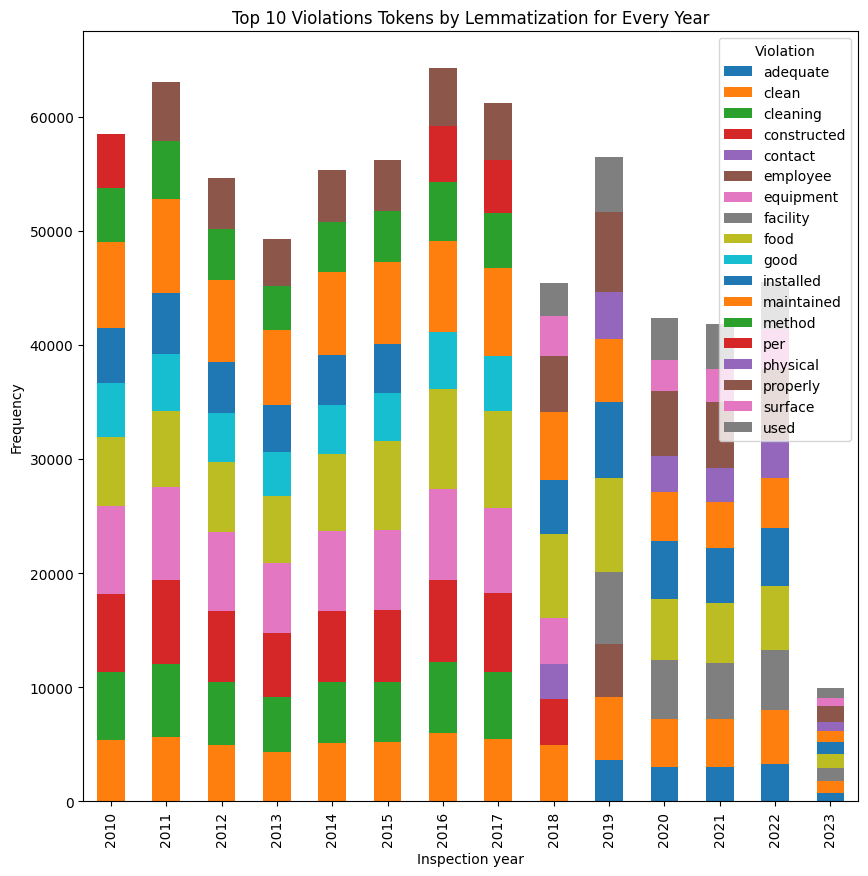

In [23]:
# generate a stacked barplot to show the top 10 violations tokens by lemmatization for every year
from matplotlib import pyplot as plt
df_top10plot = df_top10plot.pivot(index='Inspection_year', columns='Violation', values='Frequency')

df_top10plot.plot(kind='bar', stacked=True, figsize=(10, 10))

plt.title('Top 10 Violations Tokens by Lemmatization for Every Year')

plt.xlabel('Inspection year')

plt.ylabel('Frequency')

plt.show()


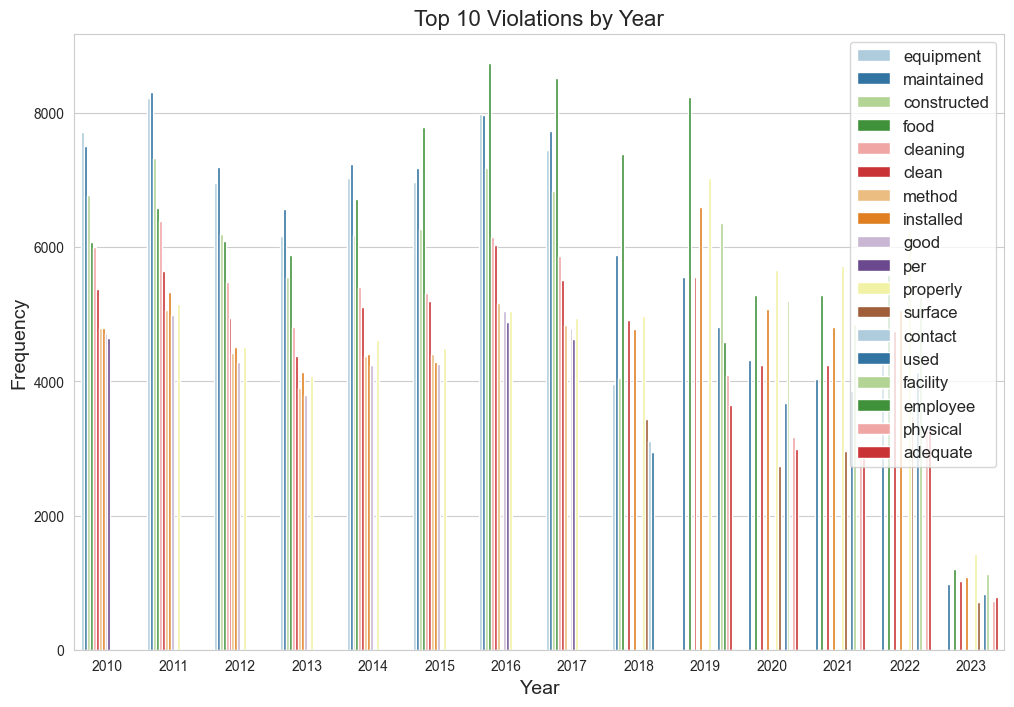

In [24]:
# Here is another way to visualize the top 10 violations tokens by lemmatization for every year
# sort the dataframe by year and frequency
import seaborn as sns
import matplotlib.pyplot as plt
dftop10plot=df_top10.copy()
df_top10_sorted = dftop10plot.sort_values(['Inspection_year', 'Frequency'], ascending=[True, False])

# generate the stacked barplot
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
sns.barplot(x='Inspection_year', y='Frequency', hue='Violation', data=df_top10_sorted, palette='Paired')
plt.title('Top 10 Violations by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12, loc='upper right')
plt.show()

#### Comments Token Check(Extra Credit?)

In [25]:
df_comments = df_fail[['Inspection ID', 'Inspection Date', 'Comments']].explode('Comments')

df_comments['Inspection Date'] = pd.to_datetime(df_comments['Inspection Date'])
df_comments['Inspection_year'] = df_comments['Inspection Date'].dt.year
df_comments

,Inspection ID,Inspection Date,Comments,Inspection_year
36,2544891,2021-12-01,2-102.14(O) OBSERVED NO EMPLOYEE HEALTH POLICY...,2021
36,2544891,2021-12-01,2-501.11 OBSERVED NO WRITTEN PROCEDURE NOR ADE...,2021
36,2544891,2021-12-01,6-301.14 OBSERVED HAND WASHING SIGNS ARE NEEDE...,2021
36,2544891,2021-12-01,3-501.16(A:1) OBSERVED TIME/TEMPERATURE CONTRO...,2021
36,2544891,2021-12-01,4-301.11 OBSERVED A HOT HOLDING UNIT (WITH TCS...,2021
...,...,...,...,...
251187,58233,2010-01-08,All food should be properly protected from con...,2010
251187,58233,2010-01-08,All food and non-food contact equipment and ut...,2010
251187,58233,2010-01-08,All utensils shall be thoroughly cleaned and s...,2010
251196,67865,2010-01-13,All necessary control measures shall be used t...,2010


In [32]:
# for loop to generate the top 10 comments tokens by lemmatization for every year
# create an empty dataframe to store the top 10 comments tokens by lemmatization for every year

df_top10_comments = pd.DataFrame(columns=['Inspection_year', 'Comments', 'Frequency'])

for year in df_comments['Inspection_year'].unique():
    # filter the df_fail dataframe for the current year
    df_year = df_comments[df_comments['Inspection_year'] == year]
    # concatenate all the values in the Violations_new column into a single string
    comments_token = ' '.join(df_year['Comments'].astype(str))
    # tokenize the string
    comments = nltk.tokenize.word_tokenize(comments_token)
    # remove single-character tokens (mostly punctuation)
    stopwords = set(nltk.corpus.stopwords.words('english'))

    # Remove single-character tokens (mostly punctuation)
    comments = [word for word in comments if len(word) > 1]

    # Remove numbers
    comments = [word for word in comments if not word.isnumeric()]

    # Remove punctuation
    comments = [word for word in comments if word.isalpha()]

    # Lowercase all words (default_stopwords are lowercase too)
    words_lc_comment = [word.lower() for word in comments]

    # Remove stopwords
    words_lc_comment = [word for word in words_lc_comment if word not in stopwords]

    wnl = nltk.WordNetLemmatizer()
    lemma_comments = [wnl.lemmatize(t) for t in words_lc_comment]
    fdist_lemma_comments= nltk.FreqDist(lemma_comments)

    fdist_lemma_comments10 = fdist_lemma_comments.most_common(10)
    # insert the top 10 comments tokens by lemmatization for the current year into the dataframe
    rows = [{'Inspection_year': year, 'Comments': fdist_lemma_comments10[i][0], 'Frequency': fdist_lemma_comments10[i][1]} for i in range(10)]
    df_top10_comments = pd.concat([df_top10_comments, pd.DataFrame(rows)])

print(df_top10_comments)


   Inspection_year    Comments Frequency
0             2021    observed     11487
1             2021  instructed      9592
2             2021        food      8455
3             2021        must      8354
4             2021        area      6763
..             ...         ...       ...
5             2022    priority      6584
6             2022    maintain      6230
7             2022        sink      5764
8             2022     manager      5657
9             2022  foundation      5596

[140 rows x 3 columns]


In [33]:
df_comments_plot = df_top10_comments.copy()
df_comments_plot.head(20)

,Inspection_year,Comments,Frequency
0,2021,observed,11487
1,2021,instructed,9592
2,2021,food,8455
3,2021,must,8354
4,2021,area,6763
5,2021,priority,6567
6,2021,foundation,5859
7,2021,provide,5830
8,2021,maintain,5545
9,2021,sink,5441


c:\Users\Richa\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


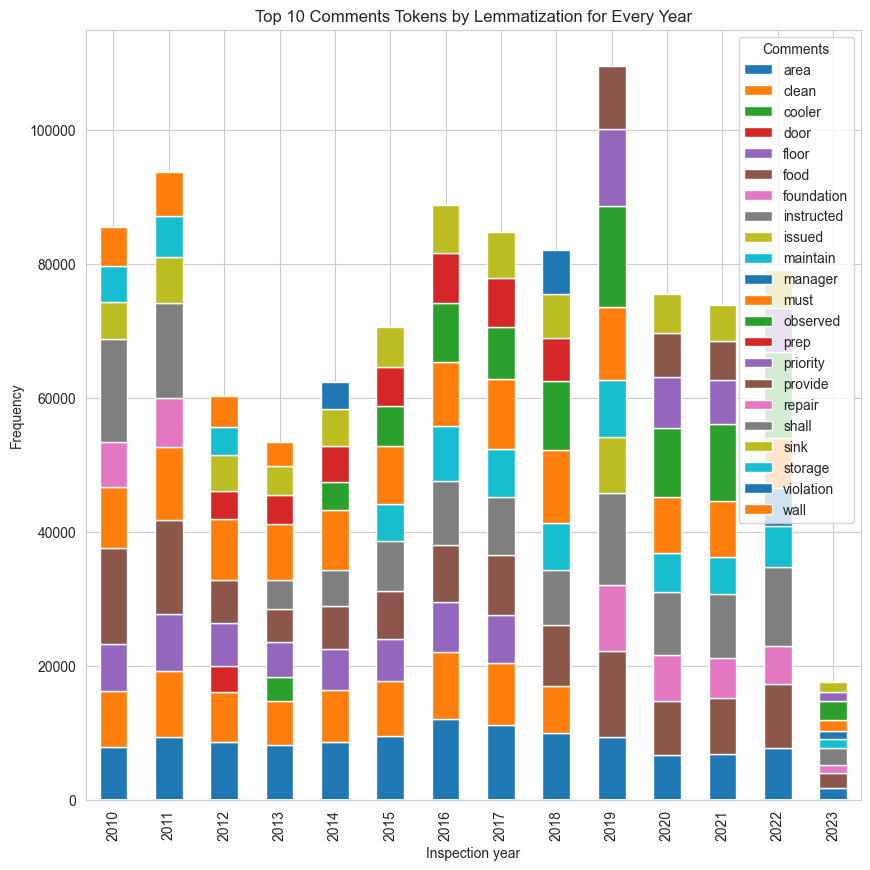

In [34]:
# create stacked barplot to show the top 10 comments tokens by lemmatization for every year

df_comments_plot = df_comments_plot.pivot(index='Inspection_year', columns='Comments', values='Frequency')

df_comments_plot.plot(kind='bar', stacked=True, figsize=(10, 10))

plt.title('Top 10 Comments Tokens by Lemmatization for Every Year')

plt.xlabel('Inspection year')

plt.ylabel('Frequency')

plt.show()
